##Let's work with the wine dataset we worked with before, but slightly modified. This has more instances and different target features

####based on http://blog.yhathq.com/posts/classification-using-knn-and-python.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation

In [2]:
import numpy as np

In [5]:
df = pd.read_csv("data/wine.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.700,0.00,1.90,0.076,11,34,0.99780,3.51,0.56,9.400000,5,red,1,0
1,7.8,0.880,0.00,2.60,0.098,25,67,0.99680,3.20,0.68,9.800000,5,red,1,0
2,7.8,0.760,0.04,2.30,0.092,15,54,0.99700,3.26,0.65,9.800000,5,red,1,0
3,11.2,0.280,0.56,1.90,0.075,17,60,0.99800,3.16,0.58,9.800000,6,red,1,0
4,7.4,0.700,0.00,1.90,0.076,11,34,0.99780,3.51,0.56,9.400000,5,red,1,0
5,7.4,0.660,0.00,1.80,0.075,13,40,0.99780,3.51,0.56,9.400000,5,red,1,0
6,7.9,0.600,0.06,1.60,0.069,15,59,0.99640,3.30,0.46,9.400000,5,red,1,0
7,7.3,0.650,0.00,1.20,0.065,15,21,0.99460,3.39,0.47,10.000000,7,red,1,1
8,7.8,0.580,0.02,2.00,0.073,9,18,0.99680,3.36,0.57,9.500000,7,red,1,1
9,7.5,0.500,0.36,6.10,0.071,17,102,0.99780,3.35,0.80,10.500000,5,red,1,0


In [4]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid', u'residual_sugar', u'chlorides', u'free_sulfur_dioxide', u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality', u'color', u'is_red', u'high_quality'], dtype='object')

###Instead of wine cultvar, we have the wine color (red or white), as well as a binary (is red) and high quality indicator (0 or 1)

In [6]:
df.high_quality.unique()

array([ 0.,  1.])

###Let's set up our training and test sets

In [10]:
train, test = cross_validation.train_test_split(df[['density','sulphates','residual_sugar','high_quality']],train_size=0.75)

###We'll use just three columns (dimensions) for classification

In [17]:
train

array([[  0.9938 ,   0.69   ,   6.6    ,   0.     ],
       [  0.9972 ,   0.42   ,  12.3    ,   0.     ],
       [  0.99576,   0.49   ,   1.6    ,   0.     ],
       ..., 
       [  0.99281,   0.6    ,   6.2    ,   0.     ],
       [  0.99478,   0.83   ,   1.3    ,   0.     ],
       [  0.99786,   0.9    ,   2.3    ,   0.     ]])

In [18]:
x_train = train[:,:3]
y_train = train[:,3]

In [19]:
x_test = test[:,:3]
y_test = test[:,3]

###Let's start with a k of 1 to predict high quality

In [20]:
clf = KNeighborsClassifier(n_neighbors=1)

In [21]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [22]:
preds = clf.predict(x_test)

In [23]:
accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(test))

In [25]:
print "Accuracy: %3f" % (accuracy,)

Accuracy: 0.785846


###Not bad. Let's see what happens as the k changes

Neighbors: 1, Accuracy: 0.785846
Neighbors: 3, Accuracy: 0.772308
Neighbors: 5, Accuracy: 0.785846
Neighbors: 7, Accuracy: 0.788923
Neighbors: 9, Accuracy: 0.798154
Neighbors: 11, Accuracy: 0.803077
Neighbors: 13, Accuracy: 0.798769
Neighbors: 15, Accuracy: 0.796308
Neighbors: 17, Accuracy: 0.798769
Neighbors: 19, Accuracy: 0.799385
Neighbors: 21, Accuracy: 0.802462
Neighbors: 23, Accuracy: 0.803077
Neighbors: 25, Accuracy: 0.804308
Neighbors: 27, Accuracy: 0.806769
Neighbors: 29, Accuracy: 0.806154
Neighbors: 31, Accuracy: 0.809846
Neighbors: 33, Accuracy: 0.808000
Neighbors: 35, Accuracy: 0.809231
Neighbors: 37, Accuracy: 0.812308
Neighbors: 39, Accuracy: 0.808615
Neighbors: 41, Accuracy: 0.808615
Neighbors: 43, Accuracy: 0.807385
Neighbors: 45, Accuracy: 0.811077
Neighbors: 47, Accuracy: 0.812308
Neighbors: 49, Accuracy: 0.807385


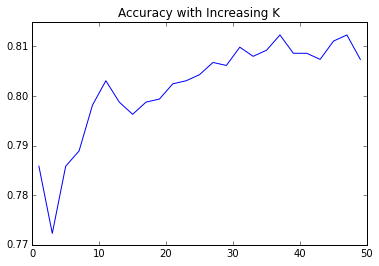

In [26]:
results = []
for k in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    preds = clf.predict(x_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (k, accuracy)

    results.append([k, accuracy])

results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

###Looks like about 80% is the best we can do. The way it plateaus, suggests there's not much more to be gained by increasing k

###We can also tune this a bit by not weighting each instance the same, but decreasing the weight as the distance increases

In [ ]:
results = []
for k in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=k,weights='distance')
    clf.fit(x_train,y_train)
    preds = clf.predict(x_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (k, accuracy)

    results.append([k, accuracy])

results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

###This actually increases the accuracy of our prediction